In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Step 1: Visualize the data
def plot_data(data):
    plt.plot(data)
    plt.xlabel('Time')
    plt.ylabel('Readings')
    plt.title('Ring Oscillator Counter Readings')
    plt.show()

# Step 2: Calculate the time intervals
def calculate_time_intervals(data):
    intervals = np.diff(data)
    return intervals

# Step 3: Perform frequency analysis
def perform_frequency_analysis(intervals, sample_rate):
    n = len(intervals)
    frequencies = fftfreq(n, d=1/sample_rate)
    spectrum = np.abs(fft(intervals))
    return frequencies[:n//2], spectrum[:n//2]

# Step 6: Evaluate frequency stability
def evaluate_frequency_stability(intervals):
    frequency_change = np.diff(intervals)
    frequency_variation = np.std(frequency_change)
    return frequency_variation

In [8]:
csv_file = '../ro_uart_logs/ro_log_resetnet18_sampled.csv'

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(csv_file)


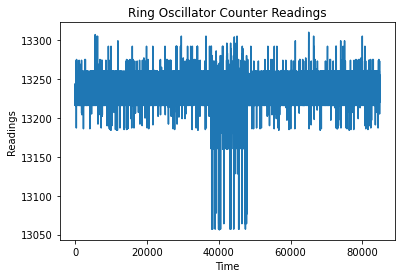

Fundamental Frequency: 0.3915795429096781
Harmonics: [0.7831590858193562, 1.1747386287290342, 1.5663181716387125, 1.9578977145483907]
Frequency Stability: 23.954403290886315


In [10]:
plot_data(df['RO_VALUES'])

# Step 2: Calculate the time intervals
intervals = calculate_time_intervals(df['RO_VALUES'].values)

# Step 3: Perform frequency analysis
sample_rate = 1.0  # Adjust if the sampling rate is different
frequencies, spectrum = perform_frequency_analysis(intervals, sample_rate)

# Step 4: Determine the fundamental frequency
fundamental_frequency = frequencies[np.argmax(spectrum)]

# Step 5: Check for harmonics
harmonics = [fundamental_frequency * i for i in range(2, 6)]  # Adjust the range as needed

# Step 6: Evaluate frequency stability
frequency_variation = evaluate_frequency_stability(intervals)

# Output the results
print("Fundamental Frequency:", fundamental_frequency)
print("Harmonics:", harmonics)
print("Frequency Stability:", frequency_variation)